In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import math
%matplotlib inline

import sys
sys.path.insert(0, '../scripts')

import stft_zoom, display, detect_musical_regions
from util import *
import mappings
import pickle
import PIL
import IPython.display

In [2]:
from classes import SingleResSpectrogram, MultiResSpectrogram

In [3]:
model = pickle.load(open('renyi_shannon_prollharm_model.sav', 'rb'))
n_fft = 2048
kernel = [800,800]

y, sr = librosa.load('../data/example.wav', sr=44100)
spec = np.abs(librosa.stft(y, n_fft=n_fft))
time_span = [0,len(y)/sr]

In [4]:
x_axis, y_axis = stft_zoom.get_axes_values(sr, 0, time_span, spec.shape) 
base_spec = SingleResSpectrogram(spec, x_axis, y_axis)
multires_spec = MultiResSpectrogram(base_spec)

In [5]:
indices, original_shape = detect_musical_regions.detect_musical_regions(model, spec, mode='threshold', pct_or_threshold=0.8)
to_be_refined = detect_musical_regions.musical_regions_to_ranges(indices, original_shape, x_axis, y_axis, kernel)

In [6]:
refined_subspecs = []
for subregion in to_be_refined:
    freq_range = subregion[0]
    time_range = subregion[1]
    spec_zoom, x_axis, y_axis, new_sr, window_size, hop_size = stft_zoom.stft_zoom(y, freq_range, time_range, sr=sr, original_window_size=n_fft, k=5)
    refined_subspec = SingleResSpectrogram(spec_zoom, x_axis, y_axis)
    refined_subspecs.append(refined_subspec)
#     multires_spec.insert_zoom(multires_spec.base_spec, refined_subspec, zoom_level=1)    

ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
ring mod + lpf
undersampling
[ 1644.18945312  2977.78320312]
(3150, 0) [172.216796875, 1505.810546875]
ring mod + lpf
ring mod + lpf
undersampling
[ 1644.18945312  2977.78320312]
(3150, 0) [172.216796875, 1505.810546875]
ring mod + lpf
ring mod + lpf
ring mod + lpf
undersampling
[ 1644.18945312  2977.78320312]
(3150, 0) [172.216796875, 1505.810546875]
ring mod + lpf
undersampling
[ 1644.18945312  2977.78320312]
(3150, 0) [172.216796875, 1505.810546875]
ring mod + lpf
ring mod + lpf
ring mod + lpf
rin

In [7]:
for refined_subspec in refined_subspecs:
    multires_spec.insert_zoom(multires_spec.base_spec, refined_subspec, zoom_level=1)    

27.7386112152279
19.54318346940527
17.899590952727678
18.98390637061519
18.173410799049957
19.287723944060915
18.08558855436702
26.634774861306468
19.07359078838903
22.510537146069346
21.041760681734985
19.616185389578387
20.54263383513361
18.598696922799043
23.1407464884085
18.574035665039514
23.201546012075376
17.747056805139795
17.180117732777227
18.034851547338224
20.133041027973174
68.72029196066148
29.73836022766072
25.695378812100422
19.869036087445394
20.132814325661705
23.40803142992394
17.674988851079945
22.678292582417583
19.41552798120827
14.319222365226752
23.201214696631514
19.60103893863449
16.166210663375377
43.67118057044031
12.824455441569432
4.400751447589506
14.255163952011223
19.45061065843812
14.700527830649524
4.336118327275382
17.79209566837317
24.888864210784863
18.96834016046809
16.006942434286145
23.68677040666308
3.9044397816696956
16.787549389442972
70.13326646404505
4.304711757430387
21.741064051322468
18.64546841624672
20.65285075364097
13.18923142273849


In [8]:
# Gerar visualização

a = multires_spec.generate_visualization()

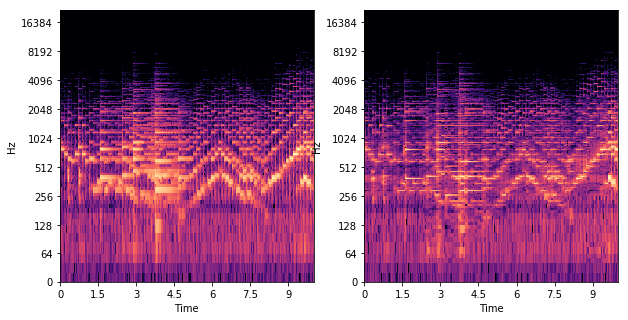

In [9]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), y_axis='log', x_axis='time', sr=sr)

plt.subplot(1,2,2)
librosa.display.specshow(librosa.amplitude_to_db(a, ref=np.max), y_axis='log', x_axis='time', sr=sr)